### Import Libraries

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

### Clean Weather Dataset

In [291]:
weather = pd.read_csv("../assets/weather.csv", na_values=['M', '-', ' '])
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67.0,14.0,51,56.0,0.0,2.0,...,NaN,0.0,NaN,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,NaN,51,57.0,0.0,3.0,...,NaN,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51.0,-3.0,42,47.0,14.0,0.0,...,BR,0.0,NaN,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52.0,NaN,42,47.0,13.0,0.0,...,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2.0,40,48.0,9.0,0.0,...,NaN,0.0,NaN,0.0,0.00,29.39,30.12,11.7,7,11.9


In [292]:
weather.shape

(2944, 22)

#### Checking datatype
Snowfall and PrecipTotal are typed as object instead of numeric while Sunrise and Sunset were typed as float64 instead of datetime.

In [293]:
# Snowfall and PrecipTotal are identified as object rather than float64
# Sunrise and Sunset were typed as float64 instead of datetime
# Date was typed as object rather than datetime
weather.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg           float64
Depart         float64
DewPoint         int64
WetBulb        float64
Heat           float64
Cool           float64
Sunrise        float64
Sunset         float64
CodeSum         object
Depth          float64
Water1         float64
SnowFall        object
PrecipTotal     object
StnPressure    float64
SeaLevel       float64
ResultSpeed    float64
ResultDir        int64
AvgSpeed       float64
dtype: object

In [294]:
# Change Date, Sunrise and Sunset to datetime format
weather['Date'] = pd.to_datetime(weather['Date'])
weather['Sunrise'] = pd.to_datetime(weather['Sunrise'], format='%H%M')
weather['Sunset'] = pd.to_datetime(weather['Sunrise'], format='%H%M')

#### Finding out why Snowfall and PrecipTotal are typed as object

'SnowFall' has 12 rows of data are having '  T' as values. To replace '  T' as 0.01 as '  T' means that there are traces amount which meant that it is in very small qunatity. Hence replace '  T' with a value smaller than the 2nd smallest value (0.1) in the data for this predictor.

In [295]:
# There is a '  T' in the list of unique values for SnowFall
weather['SnowFall'].unique()

array(['0.0', nan, '  T', '0.1'], dtype=object)

In [296]:
# Checking number of rows with '  T'
weather['SnowFall'].value_counts()

0.0    1459
  T      12
0.1       1
Name: SnowFall, dtype: int64

In [297]:
# Replace ' T' as 0.001
weather['SnowFall'].replace(to_replace='  T', value = 0.01, inplace=True)

'PrecipTotal' has 318 rows of data are having '  T' as values. To replace '  T' as 0.001 as '  T' means that there are traces amount which meant that it is in very small qunatity. Hence replace '  T' with a value smaller than the 2nd smallest value (0.01) in the data for this predictor.

In [298]:
# There is a '  T' in the list of unique values for PrecipTotal
weather['PrecipTotal'].unique()

array(['0.00', '  T', '0.13', '0.02', '0.38', '0.60', '0.14', '0.07',
       '0.11', '0.09', '1.01', '0.28', '0.04', '0.08', '0.01', '0.53',
       '0.19', '0.21', '0.32', '0.39', '0.31', '0.42', '0.27', '0.16',
       '0.58', '0.93', '0.05', '0.34', '0.15', '0.35', nan, '0.40',
       '0.66', '0.30', '0.24', '0.43', '1.55', '0.92', '0.89', '0.17',
       '0.03', '1.43', '0.97', '0.26', '1.31', '0.06', '0.46', '0.29',
       '0.23', '0.41', '0.45', '0.83', '1.33', '0.91', '0.48', '0.37',
       '0.88', '2.35', '1.96', '0.20', '0.25', '0.18', '0.67', '0.36',
       '0.33', '1.28', '0.74', '0.76', '0.71', '0.95', '1.46', '0.12',
       '0.52', '0.64', '0.22', '1.24', '0.72', '0.73', '0.65', '1.61',
       '1.22', '0.50', '1.05', '2.43', '0.59', '2.90', '2.68', '1.23',
       '0.62', '6.64', '3.07', '1.44', '1.75', '0.82', '0.80', '0.86',
       '0.63', '0.55', '1.03', '0.70', '1.73', '1.38', '0.44', '1.14',
       '1.07', '3.97', '0.87', '0.78', '1.12', '0.68', '0.10', '0.61',
       '0.

In [299]:
# Second smallest value is 0.01
np.sort([float(i) for i in np.delete(weather['PrecipTotal'].unique(), 1)])

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.95, 0.96, 0.97, 0.98, 1.01,
       1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.09, 1.11, 1.12, 1.14, 1.15,
       1.16, 1.18, 1.19, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.28, 1.29,
       1.3 , 1.31, 1.33, 1.34, 1.35, 1.38, 1.43, 1.44, 1.46, 1.48, 1.49,
       1.55, 1.57, 1.58, 1.6 , 1.61, 1.73, 1.75, 1.82, 1.88, 1.9 , 1.96,
       2.03, 2.06, 2.09, 2.17, 2.2 , 2.24, 2.35, 2.

In [300]:
# Checking number of rows with ' T'
weather['PrecipTotal'].value_counts()

0.00    1577
  T      318
0.01     127
0.02      63
0.03      46
        ... 
1.57       1
3.66       1
1.60       1
1.46       1
3.64       1
Name: PrecipTotal, Length: 167, dtype: int64

In [301]:
# Replace ' T' as 0.001
weather['PrecipTotal'].replace(to_replace='  T', value = 0.001, inplace=True)

In [302]:
# Typecast 'SnowFall' and 'PrecipTotal' as float64
weather = weather.astype({'SnowFall': 'float64', 'PrecipTotal': 'float64'})

In [303]:
# Checking that the typecast is done
weather.dtypes

Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                  float64
Depart                float64
DewPoint                int64
WetBulb               float64
Heat                  float64
Cool                  float64
Sunrise        datetime64[ns]
Sunset         datetime64[ns]
CodeSum                object
Depth                 float64
Water1                float64
SnowFall              float64
PrecipTotal           float64
StnPressure           float64
SeaLevel              float64
ResultSpeed           float64
ResultDir               int64
AvgSpeed              float64
dtype: object

#### Dropping Depth and Water1 due to no variance in data
As 'Water1' and 'Depth' only have zero and a single value respectively, hence no variance, it would not be able to provide information or contribute to the model. As such, decided to drop 'Water1' and 'Depth' from data.

In [304]:
# Checking number of unique values per predictor
print("Number of unique values for each predictor")
for col in weather.columns:
    print(f'{col}: {weather[col].nunique()}')

Number of unique values for each predictor
Station: 2
Date: 1472
Tmax: 63
Tmin: 54
Tavg: 59
Depart: 41
DewPoint: 54
WetBulb: 47
Heat: 30
Cool: 30
Sunrise: 121
Sunset: 121
CodeSum: 97
Depth: 1
Water1: 0
SnowFall: 3
PrecipTotal: 167
StnPressure: 103
SeaLevel: 101
ResultSpeed: 190
ResultDir: 36
AvgSpeed: 177


In [305]:
# Droppping 'Depth' and 'Water1' from data
weather.drop(columns=['Depth', 'Water1'], inplace=True)

#### Checking for missing values

In [306]:
weather.isnull().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg             11
Depart         1472
DewPoint          0
WetBulb           4
Heat             11
Cool             11
Sunrise        1472
Sunset         1472
CodeSum        1609
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

#### Imputing NA in CodeSum as MD
As CodeSum whitespace string, which was treated as missing values, means that the weather is moderate. Hence instead of NA, to replace with 'MD'.

In [307]:
weather['CodeSum'].fillna('MD', inplace=True)

#### Dropping Heat and Cold
As Heat and Cool are known as heating degree day (HDD) and cooling degree day (CDD) respectively and are calculated based on differences from 65°F. When Tavg is lower than 65°F, HDD will be non-zero and will be equal to 65 - Tavg while CDD will be 0. On the otherhand if Tavg is higher than 65°F, CDD will be non-zero and equal to Tavg - 65 while HDD will be 0. Hence, it does not provide additional information that Tavg does not provide.

Text(0.5, 1.0, 'Cool vs Tavg')

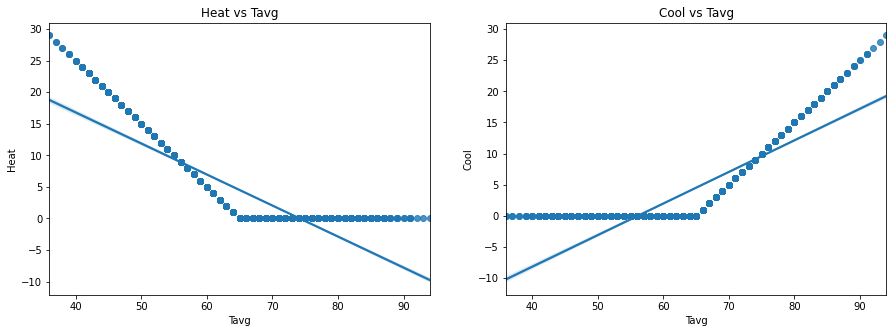

In [308]:
# SHowing how Heat and Cool vary with Tavg
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.regplot(x='Tavg', y='Heat', data=weather, ax=ax[0])
ax[0].set_title('Heat vs Tavg')
sns.regplot(x='Tavg', y='Cool', data=weather, ax=ax[1])
ax[1].set_title('Cool vs Tavg')

In [309]:
weather.drop(columns=['Heat', 'Cool'], inplace=True)

#### Split Data Set into station 1 and station 2
As station 2 has multiple predictors having missing values, either dropping the columns or dropping NA rows would lead to valuable data loss. Hence, to retain as much data as possible, the decision is to separate the data for the 2 stations with their own columns.

In [310]:
# All 1472 rows that are missing are from station 2
for col in ['Depart', 'Sunrise', 'Sunset', 'SnowFall']:
    print(col, "\n", weather[weather[col].isnull()].groupby('Station').size(), "\n")

Depart 
 Station
2    1472
dtype: int64 

Sunrise 
 Station
2    1472
dtype: int64 

Sunset 
 Station
2    1472
dtype: int64 

SnowFall 
 Station
2    1472
dtype: int64 



In [311]:
# Split weather dataset into weather1 and weather2
weather1 = weather[weather['Station'] == 1].copy()
weather2 = weather[weather['Station'] == 2].copy()

In [312]:
# Drop columns 'Depart', 'Sunrise', 'Sunset', 'Depth', 'SnowFall' from weather 2
weather2.drop(columns=['Depart', 'Sunrise', 'Sunset', 'SnowFall'], inplace=True)

In [313]:
# Merge weather_1 and weather_2 together
weather_df = pd.merge(left=weather1,
                     right=weather2,
                     on='Date',
                     suffixes=('_1', '_2'))

# Dropping "Station_1" and "Station_2"
weather_df.drop(columns=['Station_1', 'Station_2'], inplace=True)

# Renaming Sunrise, Sunset, SnowFall with suffix _1
weather_df.rename(columns={'Depart': 'Depart_1',
                           'Sunrise': 'Sunrise_1',
                           'Sunset': 'Sunset_1',
                           'SnowFall': 'SnowFall_1'}, inplace=True)

# Checking if changes were done correctly
weather_df

,Date,Tmax_1,Tmin_1,Tavg_1,Depart_1,DewPoint_1,WetBulb_1,Sunrise_1,Sunset_1,CodeSum_1,...,Tavg_2,DewPoint_2,WetBulb_2,CodeSum_2,PrecipTotal_2,StnPressure_2,SeaLevel_2,ResultSpeed_2,ResultDir_2,AvgSpeed_2
0,2007-05-01,83,50,67.0,14.0,51,56.0,1900-01-01 04:48:00,1900-01-01 04:48:00,MD,...,68.0,51,57.0,MD,0.000,29.18,29.82,2.7,25,9.6
1,2007-05-02,59,42,51.0,-3.0,42,47.0,1900-01-01 04:47:00,1900-01-01 04:47:00,BR,...,52.0,42,47.0,BR HZ,0.000,29.44,30.08,13.3,2,13.4
2,2007-05-03,66,46,56.0,2.0,40,48.0,1900-01-01 04:46:00,1900-01-01 04:46:00,MD,...,58.0,40,50.0,HZ,0.000,29.46,30.12,12.9,6,13.2
3,2007-05-04,66,49,58.0,4.0,41,50.0,1900-01-01 04:44:00,1900-01-01 04:44:00,RA,...,NaN,42,50.0,MD,0.000,29.36,30.04,10.1,7,10.4
4,2007-05-05,66,53,60.0,5.0,38,49.0,1900-01-01 04:43:00,1900-01-01 04:43:00,MD,...,60.0,39,50.0,MD,0.001,29.46,30.09,11.2,7,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2014-10-27,77,51,64.0,16.0,51,58.0,1900-01-01 06:18:00,1900-01-01 06:18:00,MD,...,67.0,52,59.0,RA,0.020,29.00,29.67,12.7,19,13.6
1468,2014-10-28,68,45,57.0,10.0,38,47.0,1900-01-01 06:19:00,1900-01-01 06:19:00,MD,...,57.0,40,48.0,RA,0.030,29.23,29.85,14.0,26,14.6
1469,2014-10-29,49,36,43.0,-4.0,32,40.0,1900-01-01 06:20:00,1900-01-01 06:20:00,MD,...,45.0,34,42.0,MD,0.000,29.42,30.07,8.5,29,9.0
1470,2014-10-30,51,32,42.0,-4.0,34,40.0,1900-01-01 06:22:00,1900-01-01 06:22:00,MD,...,45.0,35,42.0,RA,0.001,29.41,30.10,5.9,23,6.5


#### Checking which columns missing values are coming from

In [314]:
weather_df.isnull().sum().sort_values(ascending=False)

Tavg_2           11
SeaLevel_1        5
SeaLevel_2        4
AvgSpeed_2        3
WetBulb_1         3
StnPressure_2     2
PrecipTotal_2     2
StnPressure_1     2
WetBulb_2         1
AvgSpeed_1        0
ResultDir_2       0
ResultSpeed_2     0
CodeSum_2         0
DewPoint_2        0
Tmin_2            0
Tmax_2            0
Date              0
ResultDir_1       0
Tmax_1            0
PrecipTotal_1     0
SnowFall_1        0
CodeSum_1         0
Sunset_1          0
Sunrise_1         0
DewPoint_1        0
Depart_1          0
Tavg_1            0
Tmin_1            0
ResultSpeed_1     0
dtype: int64

#### Deciding to Impute or Drop Tavg_2 due to missing data

          Tavg_1    Tavg_2
Tavg_1  1.000000  0.992288
Tavg_2  0.992288  1.000000


<AxesSubplot:xlabel='Tavg_1', ylabel='Tavg_2'>

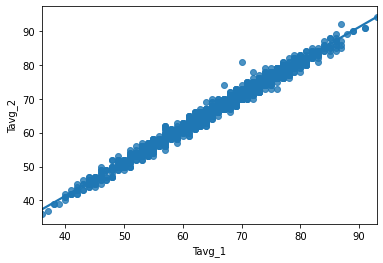

In [315]:
# Checking if Tavg_1 and Tavg_2 are correlated
print(weather_df[['Tavg_1', 'Tavg_2']].corr())
sns.regplot(x='Tavg_1', y='Tavg_2', data=weather_df)

In [316]:
# To drop Tavg_2 since there is a very high correlation coefficient with Tavg_1
weather_df.drop(columns=['Tavg_2'], inplace=True)

#### Deciding to Impute or Drop StnPressure_1 and StnPressure_2 due to missing data

               StnPressure_1  StnPressure_2
StnPressure_1       1.000000       0.998212
StnPressure_2       0.998212       1.000000


<AxesSubplot:xlabel='StnPressure_1', ylabel='StnPressure_2'>

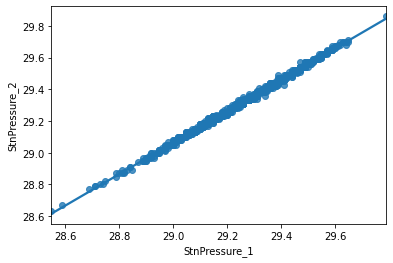

In [317]:
# Checking if StnPressure_1 and StnPressure_2 are correlated
print(weather_df[['StnPressure_1', 'StnPressure_2']].corr())
sns.regplot(x='StnPressure_1', y='StnPressure_2', data=weather_df)

In [318]:
# There is a missing value if we are using StnPressure_2 values to impute for StnPressure_1
# To look for other predictors as source of imputation
weather_df[weather_df['StnPressure_1'].isnull()]['StnPressure_2']

424     29.2
1205     NaN
Name: StnPressure_2, dtype: float64

               StnPressure_1  SeaLevel_1
StnPressure_1       1.000000    0.993641
SeaLevel_1          0.993641    1.000000


<AxesSubplot:xlabel='SeaLevel_1', ylabel='StnPressure_1'>

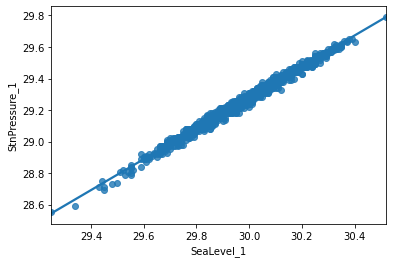

In [319]:
# Checking if SeaLevel_1 and StnPressure_1 are correlated to use for imputation
print(weather_df[['StnPressure_1', 'SeaLevel_1']].corr())
sns.regplot(x='SeaLevel_1', y='StnPressure_1', data=weather_df)

In [321]:
# Fit model to prepare for imputation
temp = weather_df[['StnPressure_1', 'SeaLevel_1']].dropna()
X = temp[['SeaLevel_1']]
y = temp['StnPressure_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f'Train Score: {lr.score(X_train, y_train)}')
print(f'Train CV Score: {cross_val_score(lr, X_train, y_train, cv=5).mean()}')
print(f'Test Score: {lr.score(X_test, y_test)}')
print(f'Coefficient: {lr.coef_[0]}')
print(f'Intercept: {lr.intercept_}')

Train Score: 0.9875312656133557
Train CV Score: 0.9872860068575051
Test Score: 0.9865146884709105
Coefficient: 0.9824624271444167
Intercept: -0.19279590259369073


In [324]:
# Impute missing value via prediction using linear model
for i in weather_df[weather_df['StnPressure_1'].isnull()].index:
    weather_df.loc[i, 'StnPressure_1'] = lr.predict([[weather_df.loc[i, 'SeaLevel_1']]])

               StnPressure_2  SeaLevel_2
StnPressure_2       1.000000    0.991628
SeaLevel_2          0.991628    1.000000


<AxesSubplot:xlabel='SeaLevel_2', ylabel='StnPressure_2'>

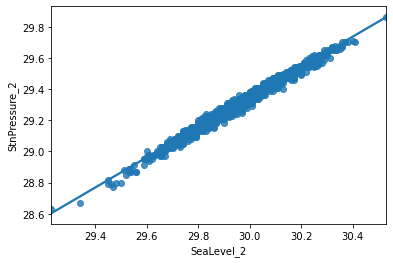

In [325]:
# Checking if SeaLevel_2 and StnPressure_2 are correlated to use for imputation
print(weather_df[['StnPressure_2', 'SeaLevel_2']].corr())
sns.regplot(x='SeaLevel_2', y='StnPressure_2', data=weather_df)

In [326]:
# Dropping SeaLevel_1, SeaLevel_2 & StnPressure_2 due to high correlation coefficient
weather_df.drop(columns=['SeaLevel_1', 'SeaLevel_2', 'StnPressure_2'], inplace=True)

In [327]:
weather_df.isnull().sum()

Date             0
Tmax_1           0
Tmin_1           0
Tavg_1           0
Depart_1         0
DewPoint_1       0
WetBulb_1        3
Sunrise_1        0
Sunset_1         0
CodeSum_1        0
SnowFall_1       0
PrecipTotal_1    0
StnPressure_1    0
ResultSpeed_1    0
ResultDir_1      0
AvgSpeed_1       0
Tmax_2           0
Tmin_2           0
DewPoint_2       0
WetBulb_2        1
CodeSum_2        0
PrecipTotal_2    2
ResultSpeed_2    0
ResultDir_2      0
AvgSpeed_2       3
dtype: int64

<AxesSubplot:>

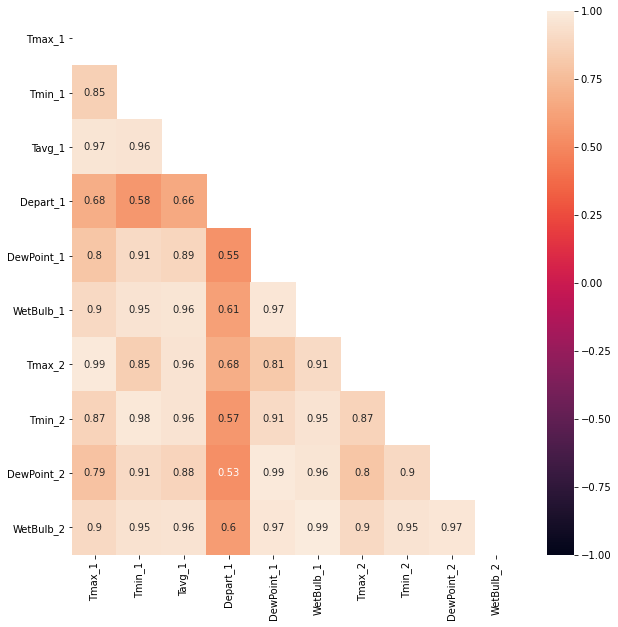

In [328]:
# Checking correlation matrix for temperatue related predictors for predictors as source for imputing missing values
predictors = ['Tmax_1', 'Tmin_1', 'Tavg_1', 'Depart_1', 'DewPoint_1', 'WetBulb_1',
              'Tmax_2', 'Tmin_2', 'DewPoint_2', 'WetBulb_2']
corr_coeff = weather_df[predictors].corr()
mask = np.zeros_like(corr_coeff)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
sns.heatmap(corr_coeff, mask=mask, vmax=1, vmin=-1, annot=True)

In [329]:
# Checking if Tmax_1 and Tmax_2 are correlated and decide if it should be dropped
print(weather_df[['Tmax_1', 'Tmax_2']].corr())

          Tmax_1    Tmax_2
Tmax_1  1.000000  0.986896
Tmax_2  0.986896  1.000000


<AxesSubplot:xlabel='Tmin_1', ylabel='Tmin_2'>

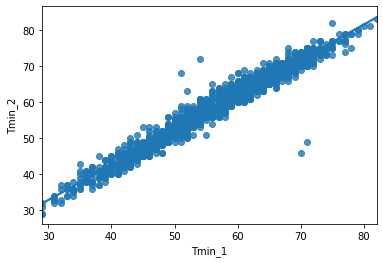

In [330]:
# Checking if Tmin_1 and Tmin_2 are correlated and decide if it should be dropped
sns.regplot(x='Tmin_1', y='Tmin_2', data=weather_df)

<AxesSubplot:xlabel='DewPoint_1', ylabel='DewPoint_2'>

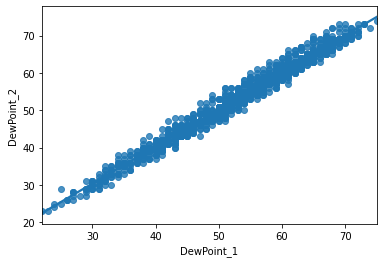

In [331]:
# Checking if DewPoint_1 and DewPoint_2 are correlated and decide if it should be dropped
sns.regplot(x='DewPoint_1', y='DewPoint_2', data=weather_df)

<AxesSubplot:xlabel='WetBulb_1', ylabel='WetBulb_2'>

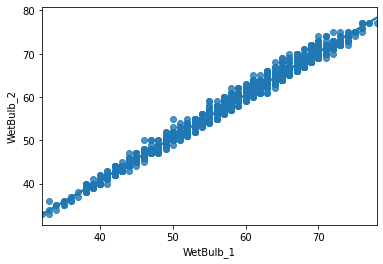

In [332]:
# Checking if WetBulb_1 and WetBulb_2 are correlated and decide if it should be dropped
sns.regplot(x='WetBulb_1', y='WetBulb_2', data=weather_df)

In [333]:
# Dropping Tmax_2, Tmin_2, DewPoint_2, WetBulb_2 as they have very high correlation coefficient with their station 1 counterpart
weather_df.drop(columns=['Tmax_2', 'Tmin_2', 'DewPoint_2', 'WetBulb_2'], inplace=True)

<AxesSubplot:>

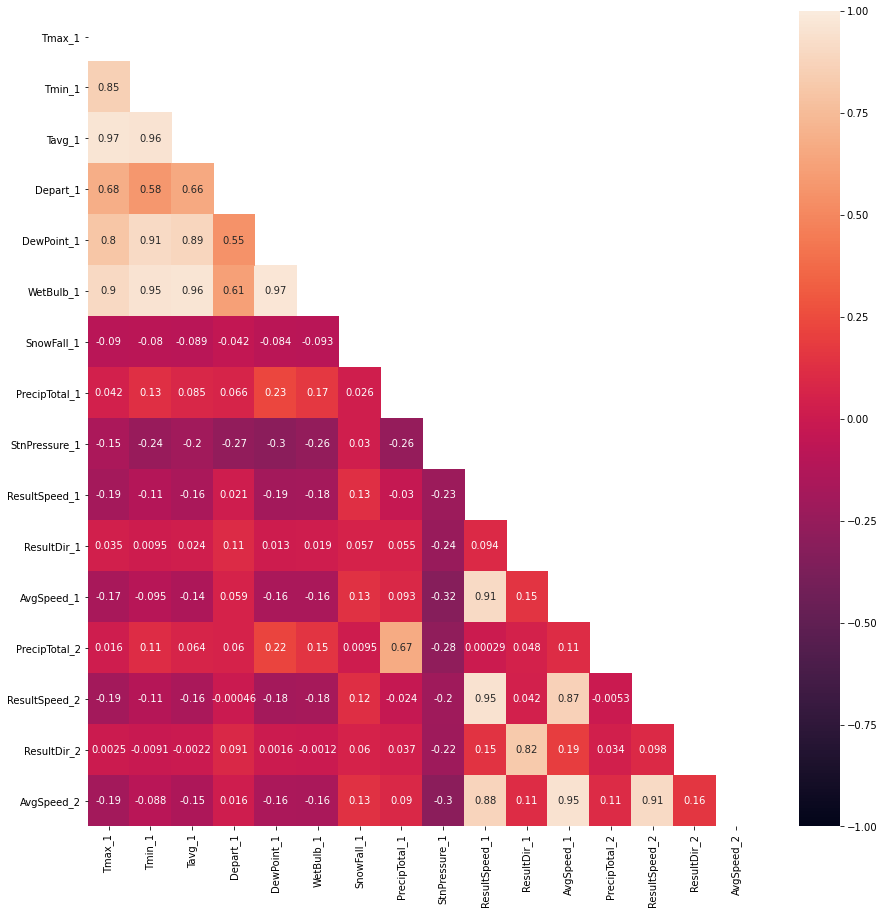

In [334]:
corr_coeff = weather_df.corr()
mask = np.zeros_like(corr_coeff)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 15))
sns.heatmap(corr_coeff, mask=mask, vmax=1, vmin=-1, annot=True)

<AxesSubplot:xlabel='ResultSpeed_1', ylabel='ResultSpeed_2'>

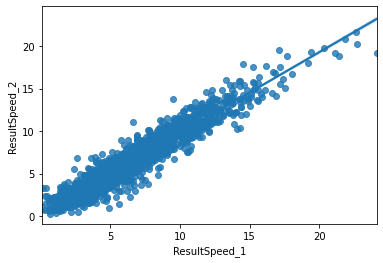

In [335]:
# Checking if ResultSpeed_1 and ResultSpeed_2 are correlated and decide if it should be dropped
sns.regplot(x='ResultSpeed_1', y='ResultSpeed_2', data=weather_df)

<AxesSubplot:xlabel='ResultDir_1', ylabel='ResultDir_2'>

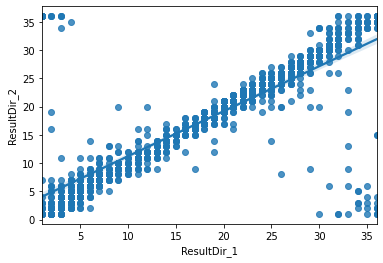

In [336]:
# Checking if ResultDir_1 and ResultDir_2 are correlated and decide if it should be dropped
sns.regplot(x='ResultDir_1', y='ResultDir_2', data=weather_df)

<AxesSubplot:xlabel='AvgSpeed_1', ylabel='AvgSpeed_2'>

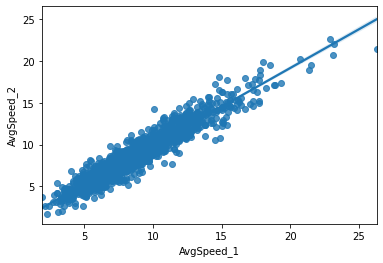

In [337]:
# Checking if AvgSpeed_1 and AvgSpeed_2 are correlated and decide if it should be dropped
sns.regplot(x='AvgSpeed_1', y='AvgSpeed_2', data=weather_df)

In [338]:
# Dropping 'ResultSpeed_2' and 'AvgSpeed_2' since it has very high correlation score with station 1
weather_df.drop(columns=['ResultSpeed_2', 'AvgSpeed_2'], inplace=True)

In [339]:
# Drop rows with na
weather_df.dropna(inplace=True)

In [340]:
# Check summary statistics
# StnPressure_1 and SnowFall_1 has very small variation
weather_df.describe()

,Tmax_1,Tmin_1,Tavg_1,Depart_1,DewPoint_1,WetBulb_1,SnowFall_1,PrecipTotal_1,StnPressure_1,ResultSpeed_1,ResultDir_1,AvgSpeed_1,PrecipTotal_2,ResultDir_2
count,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.00000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000
mean,75.970688,56.715065,66.594410,1.966599,53.363327,59.035446,0.00015,0.135101,29.253926,6.988275,17.688480,8.573756,0.128483,17.366735
std,11.517107,10.358410,10.522751,6.843174,10.684593,9.330017,0.00276,0.421677,0.156180,3.587469,10.209625,3.187229,0.363840,9.892005
min,42.000000,29.000000,36.000000,-17.000000,22.000000,32.000000,0.00000,0.000000,28.550000,0.100000,1.000000,1.900000,0.000000,1.000000
25%,68.000000,49.000000,60.000000,-3.000000,46.000000,53.000000,0.00000,0.000000,29.160000,4.400000,7.000000,6.200000,0.000000,8.000000
50%,78.000000,58.000000,68.000000,2.000000,54.000000,60.000000,0.00000,0.000000,29.260000,6.400000,20.000000,8.100000,0.000000,19.000000
75%,85.000000,65.000000,75.000000,7.000000,62.000000,66.000000,0.00000,0.060000,29.350000,9.100000,26.000000,10.400000,0.050000,24.500000
max,103.000000,82.000000,93.000000,23.000000,75.000000,78.000000,0.10000,6.860000,29.790000,24.100000,36.000000,26.300000,4.730000,36.000000


In [341]:
# Since mosquitoes dies at temperature below 50F, to create 2 additional predictors to indicate this for Tavg and Tmin
weather_df['Tavg_Below_50F'] = weather_df['Tavg_1'].apply(lambda x: 1 if x < 50 else 0)
weather_df['Tmin_Below_50F'] = weather_df['Tmin_1'].apply(lambda x: 1 if x < 50 else 0)
weather_df

,Date,Tmax_1,Tmin_1,Tavg_1,Depart_1,DewPoint_1,WetBulb_1,Sunrise_1,Sunset_1,CodeSum_1,...,PrecipTotal_1,StnPressure_1,ResultSpeed_1,ResultDir_1,AvgSpeed_1,CodeSum_2,PrecipTotal_2,ResultDir_2,Tavg_Below_50F,Tmin_Below_50F
0,2007-05-01,83,50,67.0,14.0,51,56.0,1900-01-01 04:48:00,1900-01-01 04:48:00,MD,...,0.000,29.10,1.7,27,9.2,MD,0.000,25,0,0
1,2007-05-02,59,42,51.0,-3.0,42,47.0,1900-01-01 04:47:00,1900-01-01 04:47:00,BR,...,0.000,29.38,13.0,4,13.4,BR HZ,0.000,2,0,1
2,2007-05-03,66,46,56.0,2.0,40,48.0,1900-01-01 04:46:00,1900-01-01 04:46:00,MD,...,0.000,29.39,11.7,7,11.9,HZ,0.000,6,0,1
3,2007-05-04,66,49,58.0,4.0,41,50.0,1900-01-01 04:44:00,1900-01-01 04:44:00,RA,...,0.001,29.31,10.4,8,10.8,MD,0.000,7,0,1
4,2007-05-05,66,53,60.0,5.0,38,49.0,1900-01-01 04:43:00,1900-01-01 04:43:00,MD,...,0.001,29.40,11.7,7,12.0,MD,0.001,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2014-10-27,77,51,64.0,16.0,51,58.0,1900-01-01 06:18:00,1900-01-01 06:18:00,MD,...,0.000,28.92,12.0,19,12.9,RA,0.020,19,0,0
1468,2014-10-28,68,45,57.0,10.0,38,47.0,1900-01-01 06:19:00,1900-01-01 06:19:00,MD,...,0.001,29.15,14.8,26,15.6,RA,0.030,26,0,1
1469,2014-10-29,49,36,43.0,-4.0,32,40.0,1900-01-01 06:20:00,1900-01-01 06:20:00,MD,...,0.000,29.36,9.5,29,9.9,MD,0.000,29,1,1
1470,2014-10-30,51,32,42.0,-4.0,34,40.0,1900-01-01 06:22:00,1900-01-01 06:22:00,MD,...,0.000,29.34,5.1,24,5.5,RA,0.001,23,1,1


In [342]:
weather_df['CodeSum_1'].unique()

array(['MD', 'BR', 'RA', 'BR HZ', 'RA BR', 'RA VCTS', 'RA HZ',
       'TSRA RA BR HZ', 'HZ', 'TSRA BR HZ', 'TSRA RA BR', 'TSRA RA HZ',
       'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU', 'BR HZ FU',
       'TSRA RA VCTS', 'HZ VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'RA BR HZ', 'TSRA RA',
       'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA', 'TS TSRA RA BR VCTS',
       'TS RA', 'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TSRA RA FG+ FG BR', 'TSRA DZ FG+ FG BR HZ', 'TS TSRA',
       'TSRA HZ', 'TS', 'FG+ BR HZ', 'TS TSRA BR HZ', 'DZ BR HZ',
       'TS TSRA BR', 'RA BR FU', 'TS BR HZ', 'FG+ BR', 'FG+ MIFG BR',
       'TSRA RA FG BR', 'DZ', 'RA DZ BR HZ', 'TS BR', 'TS RA FG+ FG BR',
       'RA DZ FG+ FG BR', 'RA BR SQ', 'RA FG BR', 'RA BR HZ FU',
       'MIFG BCFG BR', 'TSRA RA FG+ FG BR HZ', 'TSRA DZ BR HZ',
       'TS TSRA RA FG BR HZ', 'RA DZ FG+ BR', 'TSRA FG+ BR HZ',
       'FG+ FG BR HZ', 'FG BR HZ', 'TS RA BR HZ', 'B

In [343]:
weather_df['CodeSum_2'].unique()

array(['MD', 'BR HZ', 'HZ', 'TSRA RA BR', 'RA BR', 'TSRA RA', 'RA HZ',
       'TSRA BR HZ', 'RA BR HZ VCTS', 'RA', 'TSRA RA HZ', 'TSRA RA HZ FU',
       'BR', 'TSRA HZ', 'VCTS', 'TS TSRA RA BR HZ VCTS', 'TS TSRA BR HZ',
       'RA BR HZ', 'TSRA RA BR VCTS', 'TSRA RA DZ BR HZ', 'TSRA',
       'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA BR HZ', 'TS TSRA BR',
       'TSRA RA BR HZ', 'RA BCFG BR', 'TSRA BR', 'RA DZ', 'RA DZ BR',
       'TS TSRA RA HZ', 'TS BR', 'RA BR SQ', 'TS TSRA RA', 'TS RA',
       'TSRA RA VCTS', 'TSRA RA BR HZ VCTS', 'BR VCTS', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR', 'DZ BR HZ', 'DZ', 'FG+ FG BR', 'FG+ BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG BR HZ',
       'TS TSRA RA FG BR', 'TS BR HZ', 'BR HZ VCFG', 'TSRA RA FG+ BR',
       'TS TSRA RA VCTS', 'FU', 'TS', 'TS TSRA VCFG', 'TS TSRA HZ',
       'TS TSRA GR RA BR', 'HZ FU', 'RA BR HZ FU', 'FG+ BCFG BR',
       'TSRA RA FG+ FG BR', 'FG+', 'TSRA BR SQ', 'RA BR HZ VCFG',
       'RA FG+ BR', 'FG BR HZ',

In [344]:
temp_list = []
for i in weather_df['CodeSum_1'].unique():
    temp_list.extend(i.split(" "))

temp_list2 = set(temp_list)
temp_list = []

for i in temp_list2:
    if len(i)>2:
        temp_list.extend([i[:2], i[2:]])
    else:
        temp_list.append(i)

codesum_1_list = temp_list
print(temp_list2)
print(set(temp_list))

{'DZ', 'BR', 'TSRA', 'BCFG', 'MD', 'HZ', 'VCTS', 'FG', 'SN', 'MIFG', 'SQ', 'FU', 'TS', 'RA', 'FG+'}
{'DZ', 'BC', 'FU', 'BR', '+', 'FG', 'MD', 'HZ', 'SN', 'SQ', 'VC', 'TS', 'RA', 'MI'}


In [345]:
temp_list = []
for i in weather_df['CodeSum_2'].unique():
    temp_list.extend(i.split(" "))

temp_list2 = set(temp_list)
temp_list = []

for i in temp_list2:
    if len(i)>2:
        temp_list.extend([i[:2], i[2:]])
    else:
        temp_list.append(i)

codesum_2_list = temp_list
print(temp_list2)
print(set(temp_list))

{'DZ', 'BR', 'TSRA', 'BCFG', 'MD', 'HZ', 'VCTS', 'SN', 'FG', 'SQ', 'GR', 'FU', 'VCFG', 'TS', 'RA', 'FG+'}
{'DZ', 'BC', 'FU', 'BR', '+', 'FG', 'MD', 'HZ', 'SN', 'SQ', 'VC', 'GR', 'TS', 'RA'}


In [346]:
codesum_1_list

['DZ',
 'BR',
 'TS',
 'RA',
 'BC',
 'FG',
 'MD',
 'HZ',
 'VC',
 'TS',
 'FG',
 'SN',
 'MI',
 'FG',
 'SQ',
 'FU',
 'TS',
 'RA',
 'FG',
 '+']

In [347]:
set(codesum_1_list + codesum_2_list)

{'+',
 'BC',
 'BR',
 'DZ',
 'FG',
 'FU',
 'GR',
 'HZ',
 'MD',
 'MI',
 'RA',
 'SN',
 'SQ',
 'TS',
 'VC'}

In [348]:
# Dry Weather means a period in which there has not been a measurable precipitation event within a twenty-four (24) hour period
# Define Wet Weather as: GR, TS, RA, DZ, GS, UP, SQ, SH, PY, SN, SG, PL, IC
# Define Dry weather as: HZ, FU, VA, DU, DS, PO, SA, SS, MD

In [349]:
wet_weather = ['GR', 'TS', 'RA', 'DZ', 'GS', 'UP', 'SQ', 'SH', 'PY', 'SN', 'SG', 'PL', 'IC']
#dry_weather = ['HZ', 'FU', 'VA', 'DU', 'DS', 'PO', 'SA', 'SS', 'MD']

In [350]:
weather_df['Wet_Weather_1'] = weather_df['CodeSum_1'].apply(lambda x: int(any([1 if weather in x else 0 for weather in wet_weather])))
weather_df['Wet_Weather_2'] = weather_df['CodeSum_2'].apply(lambda x: int(any([1 if weather in x else 0 for weather in wet_weather])))
#weather_df['Dry_Weather_1'] = weather_df['CodeSum_1'].apply(lambda x: any([1 if weather in x else 0 for weather in dry_weather]))
#weather_df['Dry_Weather_2'] = weather_df['CodeSum_2'].apply(lambda x: any([1 if weather in x else 0 for weather in dry_weather]))

In [351]:
# Write to csv
weather_df.to_csv('../assets_clean/weather_clean.csv', index=False)